In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("HousePricePrediction.csv")

# Printing first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
dataset.shape


(2919, 13)

In [4]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


<AxesSubplot:>

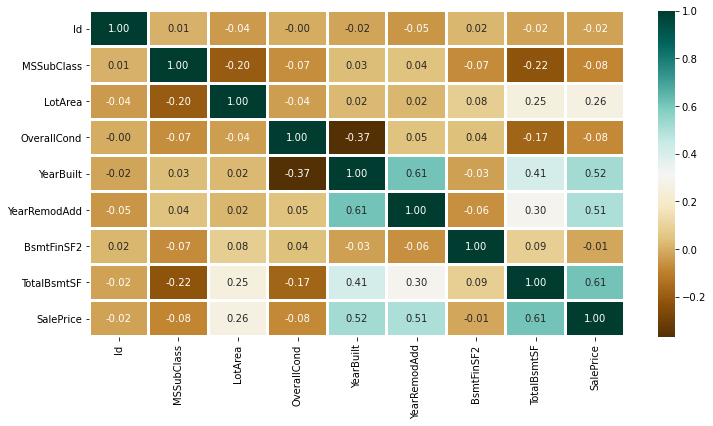

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


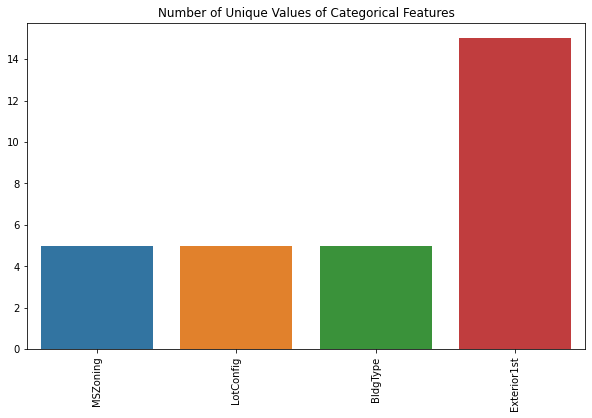

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_values = []

# Assuming object_cols is a list of column names containing categorical features
for col in object_cols:
    unique_values.append(dataset[col].nunique())

# Create a single figure outside the loop
plt.figure(figsize=(10, 6))

plt.title('Number of Unique Values of Categorical Features')
plt.xticks(rotation=90)

# Use sns.barplot to create the bar plot
sns.barplot(x=object_cols, y=unique_values)
plt.show()


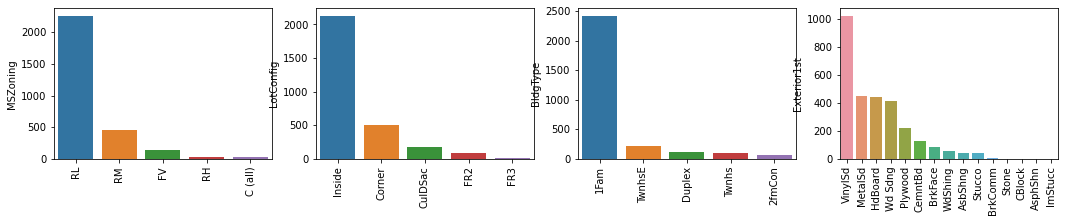

In [9]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


In [10]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)


In [11]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


In [12]:
new_dataset = dataset.dropna()


In [13]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [14]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [15]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [17]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Assuming X and Y are your features and target variable
# Split the data into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_valid_poly = poly.transform(X_valid_scaled)

# Linear Regression
model_LR = LinearRegression()
model_LR.fit(X_train_scaled, Y_train)
Y_pred_LR = model_LR.predict(X_valid_scaled)

# Lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_scaled, Y_train)
Y_pred_lasso = model_lasso.predict(X_valid_scaled)

# Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_scaled, Y_train)
Y_pred_ridge = model_ridge.predict(X_valid_scaled)

# Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, Y_train)
Y_pred_rf = model_rf.predict(X_valid_scaled)

# Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train_scaled, Y_train)
Y_pred_gb = model_gb.predict(X_valid_scaled)

# Evaluate Mean Absolute Percentage Error for each model
mape_LR = mean_absolute_percentage_error(Y_valid, Y_pred_LR)
mape_lasso = mean_absolute_percentage_error(Y_valid, Y_pred_lasso)
mape_ridge = mean_absolute_percentage_error(Y_valid, Y_pred_ridge)
mape_rf = mean_absolute_percentage_error(Y_valid, Y_pred_rf)
mape_gb = mean_absolute_percentage_error(Y_valid, Y_pred_gb)

print(f'MAPE for Linear Regression: {mape_LR}')
print(f'MAPE for Lasso Regression: {mape_lasso}')
print(f'MAPE for Ridge Regression: {mape_ridge}')
print(f'MAPE for Random Forest Regressor: {mape_rf}')
print(f'MAPE for Gradient Boosting Regressor: {mape_gb}')


C:\Users\induk\Anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140852467822.70312, tolerance: 707974264.9258481
  model = cd_fast.enet_coordinate_descent(


MAPE for Linear Regression: 28355986566.729656
MAPE for Lasso Regression: 0.20010238970557676
MAPE for Ridge Regression: 0.20010736811066523
MAPE for Random Forest Regressor: 0.20086197483265267
MAPE for Gradient Boosting Regressor: 0.2040462745270962
